### ***Customer Chun Prediction At Vodafone Corporation***

###  **Business Understanding** 
### *Problem Statement*:



In a highly competitive market, businesses strive to retain their existing customers while continuously acquiring new ones. Customer churn, the phenomenon where customers stop doing business with a company, poses a significant threat to revenue and growth. Understanding and predicting customer churn can enable businesses to implement proactive measures to improve customer retention, thereby enhancing profitability and long-term customer loyalty.



### *Business Objectives*


- Predict Customer Churn: Develop machine learning models to accurately predict the likelihood of a customer leaving Vodafone.
- Identify Key Indicators: Determine the primary factors that contribute to customer churn.
- Develop Retention Strategies: Formulate effective strategies to retain customers based on the insights gained from the churn prediction models.


### *Stakeholders*
- Azubi Africa
- Azubi Learners
- Azubi CTA

### *Business Questons*
- what is the proportion of cusotmers who have churned to those who have not 
- Are senior citizens more likely to churn compared to younger customers?
- How do churn rates vary between customers using DSL, Fiber Optic, or no internet service?
- Are customers with longer tenure have less likelihood of churning
-  Is there any pattern in customer churn based on gender?

### *Hypothesis Statement*

- Null Hypothesis (Ho):There is a no significant relationship between the total amount charged to a customer and their likelihood of churning.
 - Alternative Hypothesis (H1):- There is a significant relationship between the total amount charged to a customer and their likelihood of churning.

### *Business Successs Criteria*

- Accuracy: The model should achieve an overall accuracy of at least 85%. This ensures that the majority of predictions (both churn and non-churn) are correct.
- Precision and Recall: The model should maintain a precision and recall of at least 80%. High precision ensures that when the model predicts churn, it is usually correct. High recall ensures that the model identifies most of the actual churn cases.
- F1-Score: The F1-Score, which balances precision and recall, should be at least 0.80. This is crucial for ensuring that the model performs well in identifying churners without being biased towards either false positives or false negatives.
- AUC-ROC: The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) should be at least 0.85. A high AUC-ROC value indicates a good ability to distinguish between churners and non-churners.

### **Data Understanding**
The data for this project are  in three different locations.The first two dataset will be used for training and evaluation of the models while the last dataset will be used for testing. The following describes the columns present in the data.

- Gender -- Whether the customer is a male or a female

- SeniorCitizen -- Whether a customer is a senior citizen or not

- Partner -- Whether the customer has a partner or not (Yes, No)

- Dependents -- Whether the customer has dependents or not (Yes, No)

- Tenure -- Number of months the customer has stayed with the company

- Phone Service -- Whether the customer has a phone service or not (Yes, No)

- MultipleLines -- Whether the customer has multiple lines or not

- InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

- OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

- OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

- DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

- StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

- StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

- Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

- PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

- Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

- MonthlyCharges -- The amount charged to the customer monthly

- TotalCharges -- The total amount charged to the customer

- Churn -- Whether the customer churned or not (Yes or No)



##### *Install all necessary libraries* 

In [187]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install tensorflow
# %pip install keras
# %pip install scikit-learn
# %pip install imbalanced-learn
# %pip install openpyxl
# %pip install joblib
# %pip install python-dotenv


In [188]:
# %pip install pyodbc

*Import  neccessary libraries for the project*

In [189]:
#data manipulation libraries
import pandas as pd
import numpy as np 

#data visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns 

#statistics libraries 
from scipy import stats
import statistics as stat
from scipy.stats import chi2_contingency,mannwhitneyu


#database connection
import pyodbc
from dotenv import dotenv_values

#machine learning libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler,OneHotEncoder,FunctionTransformer,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.feature_selection import SelectKBest ,mutual_info_classif
import joblib 
import os


# hide warning
import warnings
warnings.filterwarnings('ignore')



*setup a databse connection*

In [190]:
# load environment variable from .env file
environment_variables =dotenv_values('.env')
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"
 
connection = pyodbc.connect(connection_string)

*load the first dataset from a SQL server*

In [191]:
# display all column of the dataset
pd.set_option('display.max_columns', None)
# loading the first 3000 records from SQL Server
query="SELECT * FROM dbo.LP2_Telco_churn_first_3000"
data1=pd.read_sql(query, connection)
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [192]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [193]:
# check the number of missing values from each column
data1.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [194]:
# checking for duplicates in the dataset
data1.duplicated().sum()

0

*Load the second dataset*

In [195]:
# display all column of thr dataset
pd.set_option('display.max_columns', None)
# load the dataset
data2 = pd.read_csv('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/CUSTOMER-CHUN-PREDICTION-AT-VODAFONE-CORPORATION/data/LP2_Telco-churn-second-2000.csv')
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [196]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [197]:
# check for missing values
data2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [198]:
# check for duplicates in the data
data2.duplicated().sum()

0

### *Concatenate the two datasets*

In [199]:
main_df = pd.concat([data1,data2],axis=0)
main_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


### *Data Quality Assessment*

*Exploratory Data Analysis*

In [200]:
# check the information of the dataframe
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [201]:
# check for missing values
main_df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

*check for duplicates in the data*

In [202]:
main_df.duplicated().sum()

0

In [203]:
# convert the totalcharge column to numerical datatype
main_df['TotalCharges'] =pd.to_numeric(main_df['TotalCharges'],errors='coerce')

In [204]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
TotalCharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


In [205]:
main_df.describe(include ='object').T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
Partner,5043,4,False,1538
Dependents,5043,4,False,2070
PhoneService,5043,4,True,2731
MultipleLines,4774,5,False,1437
InternetService,5043,3,Fiber optic,2248
OnlineSecurity,4392,5,False,1478
OnlineBackup,4392,5,False,1320
DeviceProtection,4392,5,False,1296


- The dataset comprises 21 columns and 5,043 rows.
- There are 269 missing values in the "multiplelines" column, 5 missing values in the "Totalcharges" column, and 1 missing value in the "churn" column.
- The "OnlineSecurity," "OnlineBackup," "DeviceProtection," "TechSupport," "StreamingTV," and "StreamingMovies" columns each have 651 missing values.
- The "Totalcharges" column is in string format instead of float.
- The data is not normally distributed.
- There are no duplicate entries in the dataset.

*check for unique values in each columns*

In [206]:
# print out columns
columns =main_df.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [207]:
#checking for unique values
for column in columns:
    print(f"{column}")
    print(f"There are {main_df[column].nunique()} unique values")
    print(f'{main_df[column].unique()}')
    print('-' * 50)

customerID
There are 5043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender
There are 2 unique values
['Female' 'Male']
--------------------------------------------------
SeniorCitizen
There are 2 unique values
[0 1]
--------------------------------------------------
Partner
There are 4 unique values
[True False 'No' 'Yes']
--------------------------------------------------
Dependents
There are 4 unique values
[False True 'No' 'Yes']
--------------------------------------------------
tenure
There are 73 unique values
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService
There are 4 unique values
[False True 'Yes' 'No']
--------------------------------

#### *Data Cleaning*

The combined dataset contains value of various categories. we need to use the dictionary to map values together in order to form a meanigful categories 

In [208]:
#define a dictionary to map boolean and None values to a meaningful categories
mapping_new_cat_values = {
    'Partner':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes',},
    'Dependents':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'PhoneService':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'MultipleLines':{ False:'No', True:'Yes', 'No':'No', 'No phone service':'No phone service' , 'Yes':'Yes'},
    'OnlineSecurity':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service' },
    'OnlineBackup':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'DeviceProtection':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'TechSupport':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'StreamingTV':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'StreamingMovies':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'PaperlessBilling':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'Churn':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'SeniorCitizen':{0:'No',1:'Yes'}
    }
    # convert the columns to category_column
for col in mapping_new_cat_values.keys():
    main_df[col] = main_df[col].astype('category')
# map the boolean and None values to meaningful categories  

main_df.replace(mapping_new_cat_values, inplace=True)
main_df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.500000,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,No
7,6713-OKOMC,Female,No,No,No,10,No,NaN,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.750000,301.899994,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800003,3046.050049,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.150002,3487.949951,No


### *Univariate Analysis*

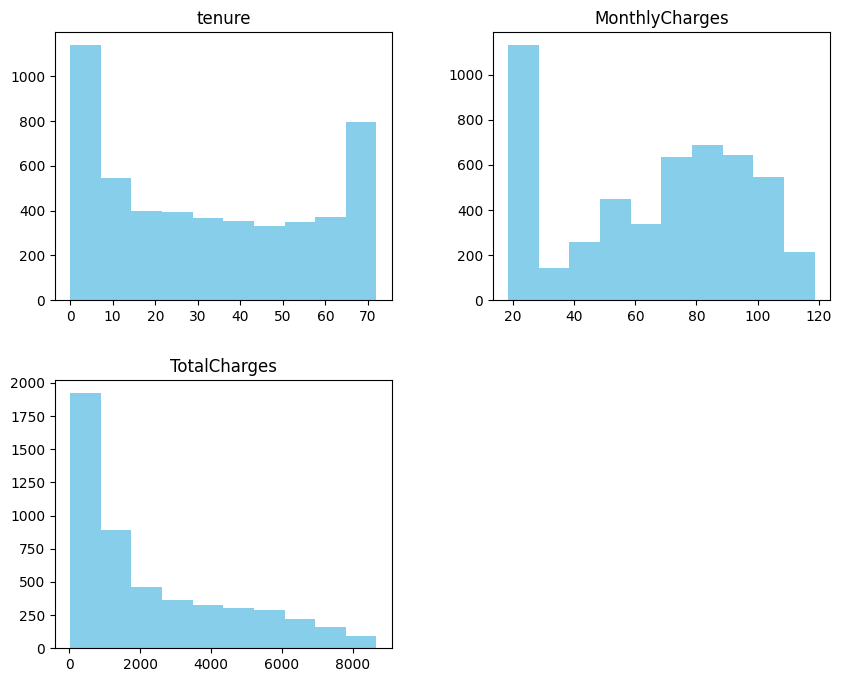

In [209]:
# visualizing the distribution of the numeric columns
main_df.hist(figsize=(10,8),grid=False,color='skyblue')
plt.show()

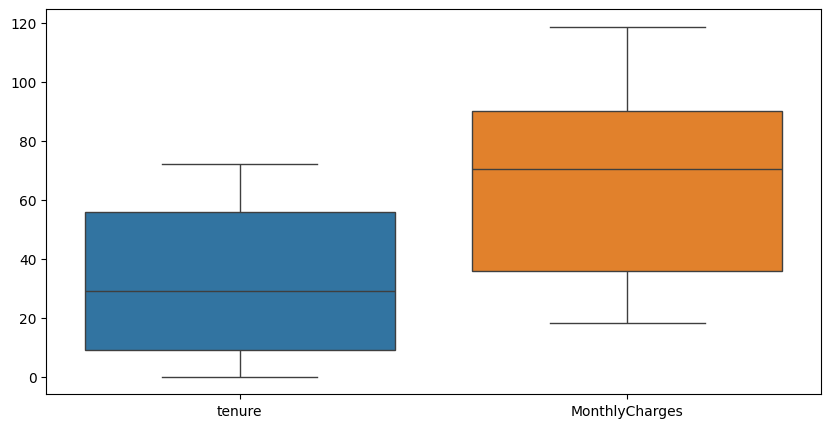

In [210]:
plt.figure(figsize=(10,5))
sns.boxplot(main_df.drop(['TotalCharges'],axis=1))
plt.show()

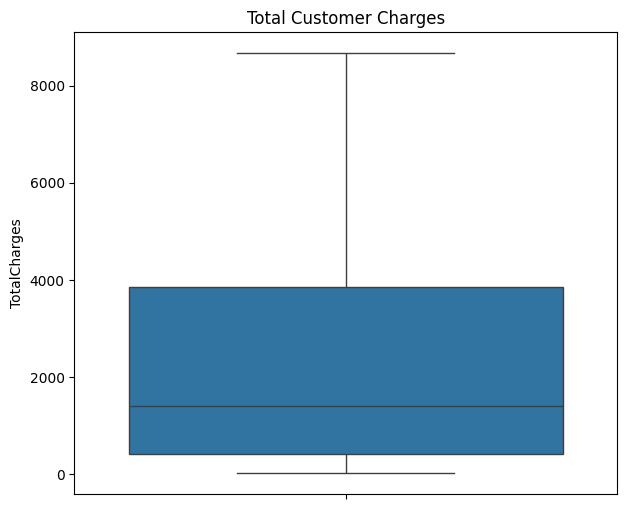

In [211]:
plt.figure(figsize=(7,6))
sns.boxplot(main_df['TotalCharges'])
plt.title('Total Customer Charges')
plt.show()

#### *Tenure*
- There is a high frequency of customers with very low tenure (near 0 months), indicating many new or short-term customers.
- There's another spike at the maximum tenure value (around 70 months), suggesting a significant number of long-term customers.
- This distribution suggests that customers tend to either leave early or stay for a long time, with fewer customers having mid-range tenure.

#### MonthlyCharges
- There is a high concentration of customers with low monthly charges (around $20-$30).
- As the charges increase, the number of customers initially drops but then increases and peaks again around $70-$90 before declining.
- This indicates two main groups of customers: those paying low monthly charges and those paying moderate to high monthly charges.


#### *TotalCharges*

- The majority of customers have low total charges, which aligns with many customers having short tenures.
- The number of customers decreases steadily as total charges increase, showing a right-skewed distribution.
- There are very few customers with extremely high total charges
- The total charges are largely driven by tenure, with newer customers having lower total charges and long-term customers accumulating higher charges over time.


Churn Value Counts: Churn
No     3706
Yes    1336
Name: count, dtype: int64
Churn Rate: 26.492167360697998


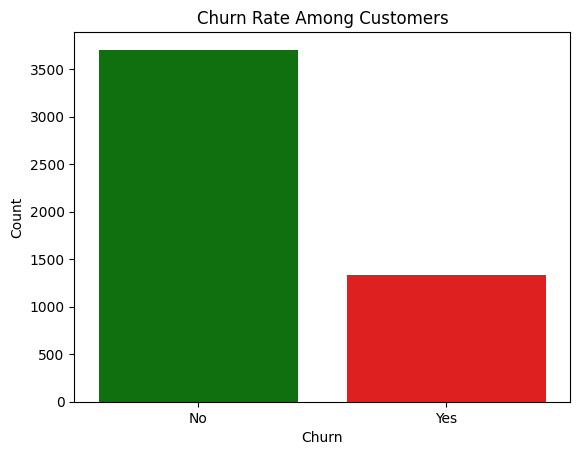

In [212]:
# calculate number of customers who have churned and who have not
churn_value_counts = main_df['Churn'].value_counts()
print("Churn Value Counts:", churn_value_counts)
# Calculate the total number of customers
total_customers = len(main_df)

# Calculate the number of customers who churned
churned_customers = len(main_df.loc[main_df['Churn'] == 'Yes'])

# Calculate the churn rate
churn_rate = (churned_customers / total_customers) * 100

print("Churn Rate:", churn_rate)
# reset index
main_df.reset_index(inplace=True)
# distribution of churn

sns.countplot(x='Churn',data=main_df,color='blue', palette={'Yes': 'red', 'No': 'green'})
plt.title('Churn Rate Among Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

The dataset reveals that 3,706 customers have not churned, representing the majority and indicating that most customers remain with the company. Conversely, 1,336 customers have churned, resulting in a churn rate of 26.5%. This substantial minority highlights that a significant number of customers have left the company.

## *Bi-variate Analysis*

Check for the relationship among the numerical values in the dataset

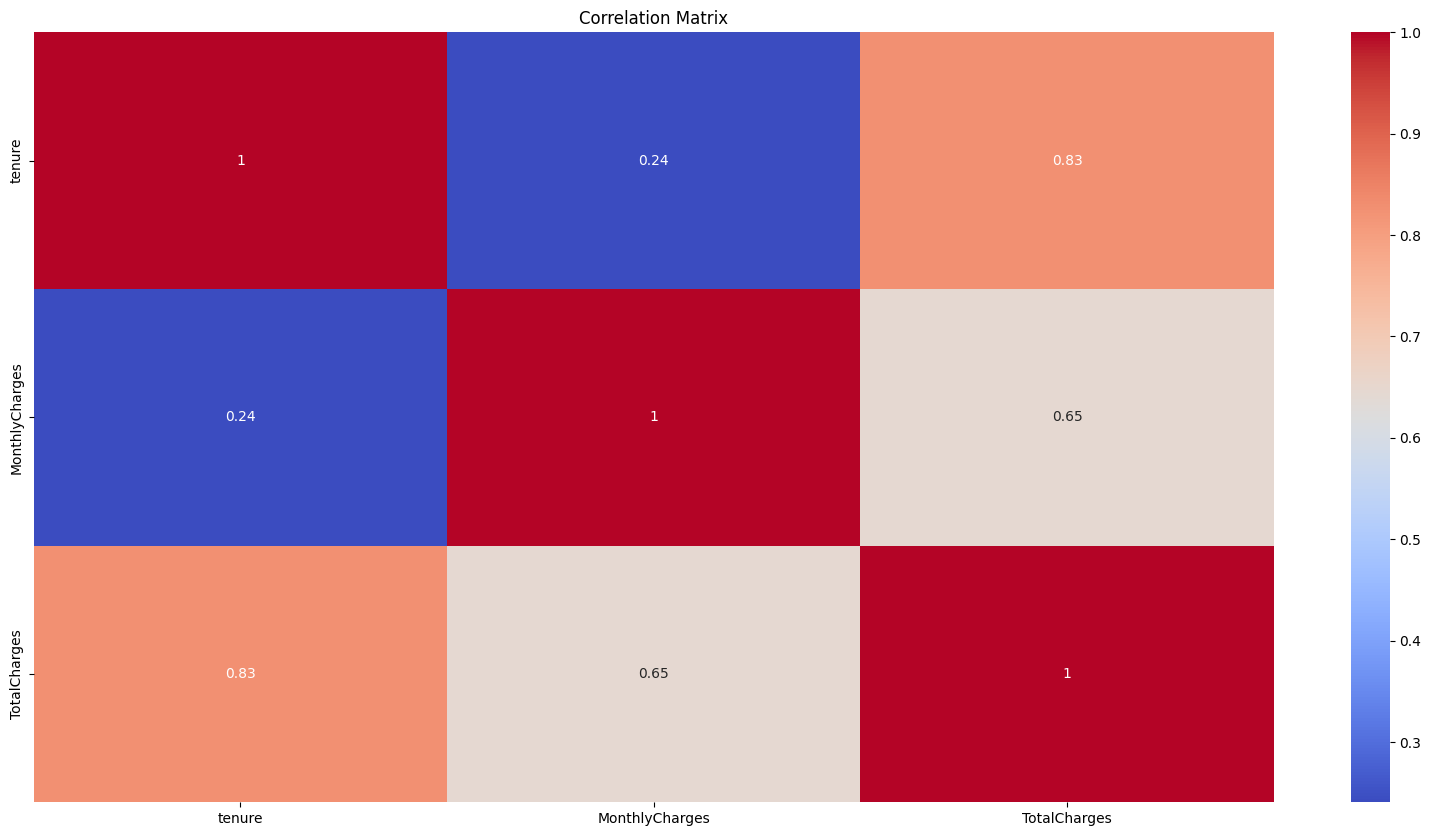

In [213]:
# check for the relationship between each pair of varibales using correlation matrix
numeric_df = main_df.select_dtypes(include=[np.number])
# drop index column
numeric_df = numeric_df.drop(columns=['index'])

corr_matrix = numeric_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()  



The above correlation matrix explains the strength of the relationship between the following columns;
TotalCharges,Monthlycharges,tenure
- there is a strong positive correlation between the tenure and totalcharges made by the customer i.e the longer the customer stays with the company the higher the totalcharges made.
- Also the higher the monthly charges the higher the total charges made by the customers this also suggest a positive correlation.

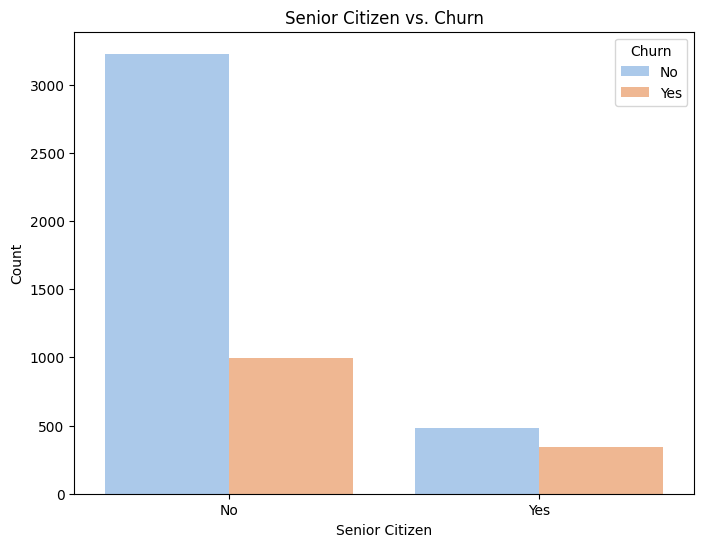

In [214]:
# Plotting the stacked bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=main_df, palette='pastel')
plt.title('Senior Citizen vs. Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()



The visualization indicates that most senior citizens have churned, while a considerable number of younger customers remain with the company. Although younger customers constitute a larger percentage of the company's customer base, senior citizens exhibit the highest ratio of churn to retention. This trend could be attributed to an increase in charges affecting senior customers.

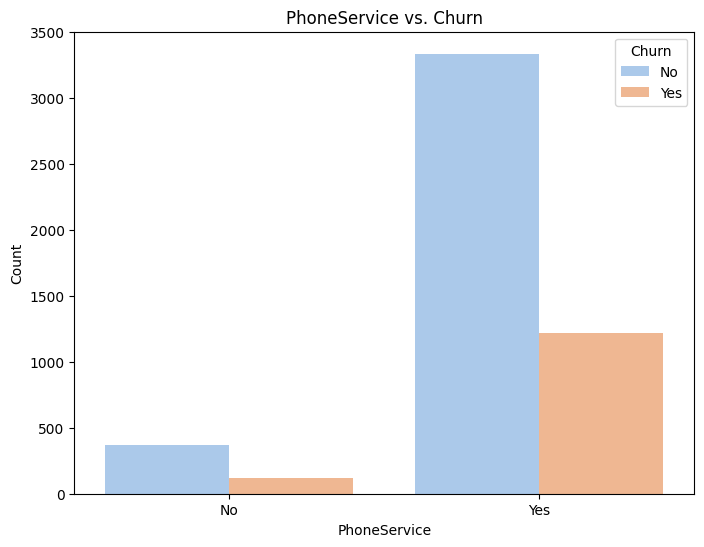

In [215]:
# Plotting the stacked bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='PhoneService', hue='Churn', data=main_df, palette='pastel')
plt.title('PhoneService vs. Churn')
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

from the above visualization it shows that a considerable amount of customers using the phone services are still with the company although approximately 1500 customers among this customers have churned 

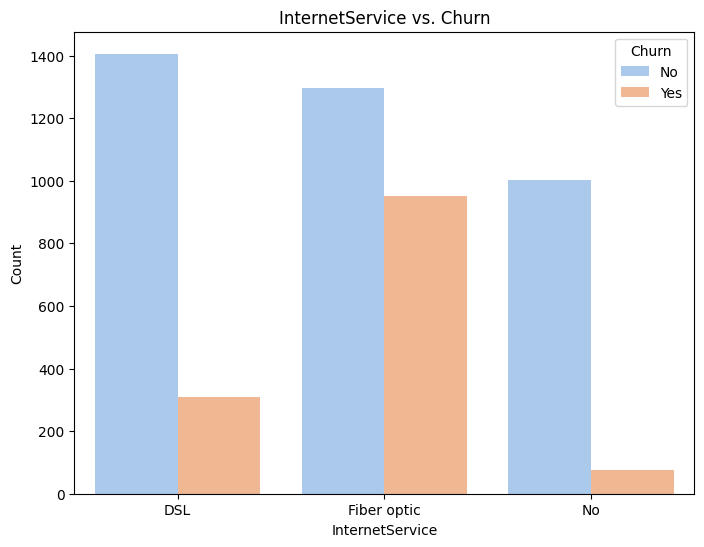

In [216]:
# Plotting the stacked bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=main_df, palette='pastel')
plt.title('InternetService vs. Churn')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

- The interpretation suggests that InternetService is an important factor influencing customer churn behavior.
- from the above visualization we can observe that customers using fiberoptics has a higher churn rate compared to those with DSL and those without internet service.

### *Hypothesis Testing*

 - Null Hypothesis (Ho):There is a no significant relationship between the total amount charged to a customer and their likelihood of churning.
 - Alternative Hypothesis (H1):- There is a significant relationship between the total amount charged to a customer and their likelihood of churning.

we will carryout a non-parametric test because our data is not normally distributed. therefore we will test the hypothesis with mannwitneyu test

In [217]:
# drop missing values from the totalcharges column
main_df.dropna(subset=['TotalCharges'], inplace=True)
# Separate data into churned and non-churned groups
churn_yes = main_df[main_df['Churn'] == 'Yes']['TotalCharges']
churn_no = main_df[main_df['Churn'] == 'No']['TotalCharges']

# Perform Mann-Whitney U test
U_statistic, p_value = mannwhitneyu(churn_yes, churn_no,)

print(f"Mann-Whitney U statistic: {U_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between totalcharges and Churn.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between totalcharges and Churn.")

Mann-Whitney U statistic: 1735257.0
P-value: 1.2635460045211262e-58
Reject the null hypothesis. There is a significant relationship between totalcharges and Churn.


The results of the Mann-Whitney U test yield a U statistic of 1,735,257.0 and a p-value of 1.2635460045211262e-58. Given the extremely low p-value, we reject the null hypothesis. This indicates that there is a significant relationship between total charges and customer churn.

### **Answering the Business Questions*

- what is the proportion of cusotmers who have churned to those who have not 


Churn Value Counts: Churn
No     3698
Yes    1336
Name: count, dtype: int64
Churn Rate: 26.53426017874876


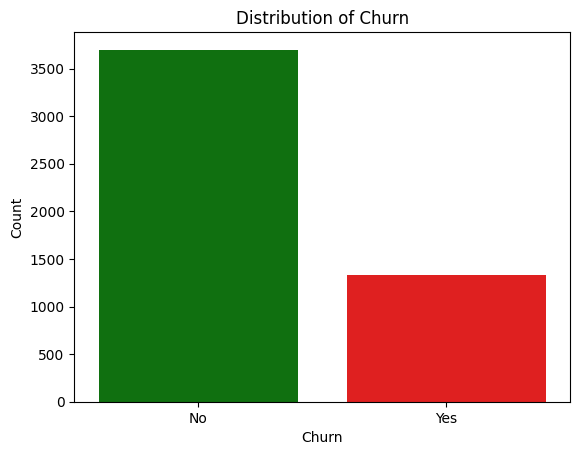

In [218]:
# calculate number of customers who have churned and who have not
churn_value_counts = main_df['Churn'].value_counts()
print("Churn Value Counts:", churn_value_counts)
# Calculate the total number of customers
total_customers = len(main_df)

# Calculate the number of customers who churned
churned_customers = len(main_df.loc[main_df['Churn'] == 'Yes'])

# Calculate the churn rate
churn_rate = (churned_customers / total_customers) * 100

print("Churn Rate:", churn_rate)
# distribution of churn
sns.countplot(x='Churn',data=main_df,color='blue', palette={'Yes':'red', 'No': 'green'})
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

- Are senior citizens more likely to churn compared to younger customers?


<Figure size 800x600 with 0 Axes>

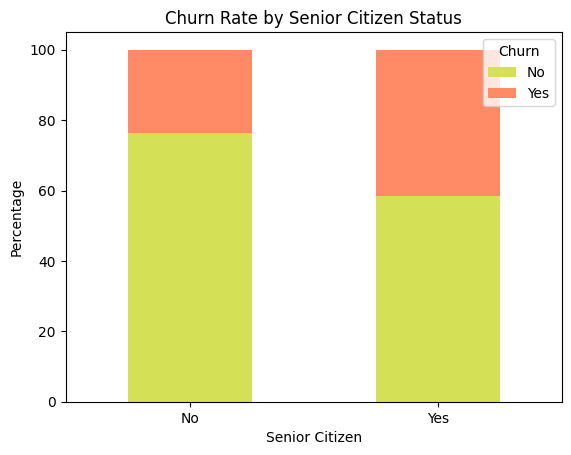

In [219]:
churn_rates = main_df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100
# Plot the churn rates
plt.figure(figsize=(8, 6))
churn_rates.plot(kind='bar', stacked=True, color=['#d4e157', '#ff8a65'])
plt.title('Churn Rate by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.show()


The bar chart illustrates the churn rate by senior citizen status. Among non-senior citizens, the majority, approximately 74%, remain with the company, as indicated by the larger yellow section of the bar. Conversely, about 26% of non-senior citizens have churned, shown by the smaller orange section of the bar. For senior citizens, the churn rate is noticeably higher. Approximately 42% of senior citizens stay with the company, while around 58% have churned, as reflected by the larger orange section. This indicates that senior citizens have a significantly higher churn rate compared to non-senior citizens. Despite constituting a smaller percentage of the overall customer base, senior citizens are more likely to leave the company. This suggests that factors such as increased charges or other issues may disproportionately impact senior citizens, leading to their higher churn rate.

- How do churn rates vary between customers using DSL, Fiber Optic, or no internet service?


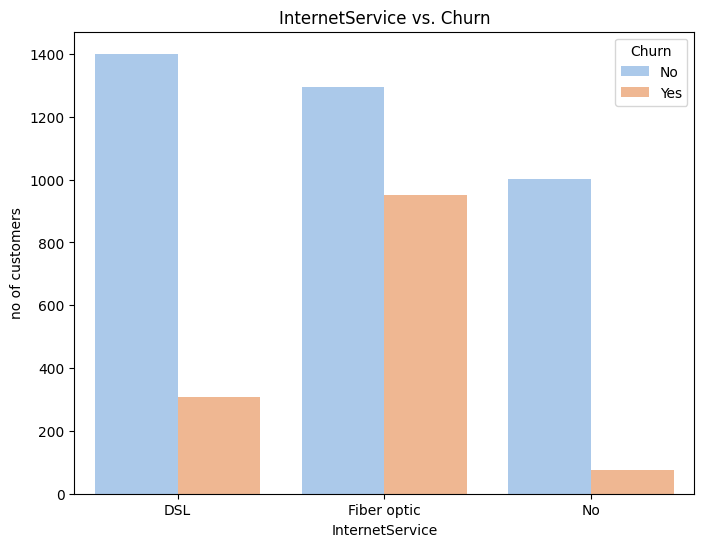

In [220]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=main_df, palette='pastel')
plt.title('InternetService vs. Churn')
plt.xlabel('InternetService')
plt.ylabel('no of customers')
plt.legend(title='Churn', loc='upper right')
plt.show()


The bar chart compares the churn rates across different types of internet services (DSL, Fiber optic, and No internet service). Customers using DSL internet service exhibit the lowest churn rate, with over 1,400 customers remaining and fewer than 300 customers churning. In contrast, customers with fiber optic internet service show a higher churn rate. While around 1,300 fiber optic users do not churn, approximately 900 customers do leave, indicating a significant churn rate. For customers without internet service, the churn rate is low, with about 1,000 customers staying and very few churning. Overall, the data suggests that DSL users have the highest retention rates, followed by those without internet service, whereas fiber optic users are more prone to churn, indicating potential issues with fiber optic service driving higher customer departures.

- Is there any pattern in customer churn based on gender?

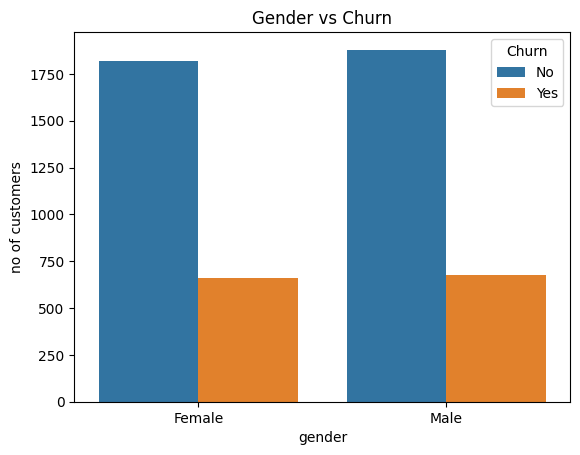

In [221]:
sns.countplot(main_df, x='gender',hue='Churn')
plt.xlabel('gender')
plt.ylabel('no of customers')
plt.title('Gender vs Churn')
plt.show()


Churn with both gender is neutral

- Do customers with Longer tenure have less churn ?

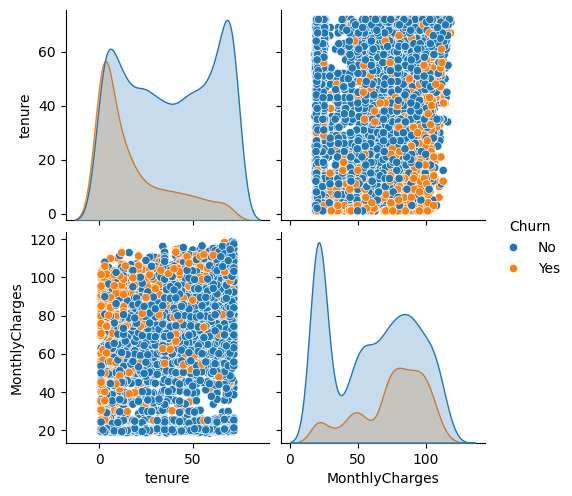

In [222]:
sns.pairplot(main_df,vars=['tenure','MonthlyCharges'],hue='Churn')
plt.show()

Customer with longer tenure has less churn

## *Data Preparation and preprocessing*

#### *Split data into input  and target features*

- X = input_columns
- y = target_column

In [223]:
# Drop rows where the target column has NaN values
df_cleaned = main_df.dropna(subset=['Churn'])


In [224]:
# # split data into x and y and drop index,coustomerID and churn columns
X = df_cleaned.drop(columns=['index','customerID','Churn'], axis =1)  
y = df_cleaned['Churn']

#### *split data into train and test set*

In [225]:
# split X,y into train and test set using the train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =42,stratify=y)
X_train,X_test,y_train,y_test

(      gender SeniorCitizen Partner Dependents  tenure PhoneService  \
 3581    Male            No     Yes        Yes      68          Yes   
 1819  Female            No     Yes        Yes      61           No   
 423     Male            No     Yes        Yes      44          Yes   
 1491  Female            No      No         No       1          Yes   
 4143    Male            No     Yes        Yes      50          Yes   
 ...      ...           ...     ...        ...     ...          ...   
 3215  Female            No     Yes         No       8          Yes   
 4     Female            No      No         No       2          Yes   
 400   Female            No      No         No      32          Yes   
 1277  Female            No     Yes        Yes      72          Yes   
 3491    Male            No      No         No      21          Yes   
 
      MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
 3581           Yes     Fiber optic                  Yes         

#### *Encoding the target data*

In [226]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


#### *separate the numerical and categorical data in the input data*

In [227]:
# Select only categoriacal columns
categorical_columns = X.select_dtypes(['category','object']).columns.tolist()
categorical_columns


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [228]:
# Select only numeric columns
numeric_columns = X.select_dtypes('number').columns.tolist()
numeric_columns


['tenure', 'MonthlyCharges', 'TotalCharges']

In [229]:
X.select_dtypes('number').skew()

tenure            0.223580
MonthlyCharges   -0.239769
TotalCharges      0.944216
dtype: float64

In [230]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('power_transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', RobustScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical data', numerical_transformer, numeric_columns),
        ('categorical data', categorical_transformer, categorical_columns)
    ]
)



In [231]:
preprocessor 

ColumnTransformer(transformers=[('numerical data',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('power_transformer',
                                                  PowerTransformer()),
                                                 ('scaler', RobustScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('categorical data',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [232]:
transformed_data = preprocessor.fit_transform(X)
pd.DataFrame(transformed_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,-0.965063,-0.759310,-1.106083,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.099222,-0.251054,0.141495,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.884786,-0.308459,-0.851739,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.293267,-0.523848,0.128690,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.884786,0.001830,-0.769115,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5029,-0.108679,0.258646,0.167263,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5030,0.681614,0.590674,0.942328,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5031,-0.465097,-0.764082,-0.533553,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5032,-0.759987,0.069446,-0.571670,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## *modelling and Evaluation*

In [233]:
models =[
    ('Decision Tree',DecisionTreeClassifier(random_state=42)),
    ('SVC',SVC(random_state=42,probability=True)),
    ('Random Forest',RandomForestClassifier(random_state=42)),
    ('Logistic Regression',LogisticRegression(random_state=42))
]
# Mapping dictionary
label_map = {'No': 0, 'Yes': 1}


#### *Train unbalanced data*

In [234]:
unbalanced_table =pd.DataFrame(columns =['Model','Accuracy','Precision','Recall','f1_score'])
unbalanced_pipeline = {}
for model_name, classifier in models:
    pipeline =Pipeline(steps =[
        ('preprocessor',preprocessor),
        ('classifier',classifier)
    ])
    pipeline.fit(X_train,y_train)
    unbalanced_pipeline[model_name] = pipeline
    y_pred = pipeline.predict(X_test)
    # Map the string predictions to binary format
    y_pred_mapped = np.array([label_map[pred] for pred in y_pred])
    
    report = classification_report(y_test_encoded,y_pred_mapped)
    # Print the results
    
    unbalanced_metrics = classification_report(y_test_encoded,y_pred_mapped,output_dict=True)
    
    accuracy = unbalanced_metrics['accuracy']
    precision = unbalanced_metrics['weighted avg']['precision']
    recall = unbalanced_metrics['weighted avg']['recall']
    f1 = unbalanced_metrics['weighted avg']['f1-score']
    
    unbalanced_table.loc[len(unbalanced_table)] = [model_name,accuracy,precision,recall,f1]
    
unbalanced_table.sort_values(by='f1_score',ascending=False)
    


,Model,Accuracy,Precision,Recall,f1_score
3,Logistic Regression,0.809335,0.800477,0.809335,0.802286
1,SVC,0.799404,0.788724,0.799404,0.790616
2,Random Forest,0.795432,0.784566,0.795432,0.786826
0,Decision Tree,0.738828,0.739770,0.738828,0.739292


- *Generating Confusion Matrix*

In [235]:
all_confusion_matrix = {}

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_mapped)

all_confusion_matrix[model_name] = conf_matrix

all_confusion_matrix


{'Logistic Regression': array([[670,  70],
        [122, 145]], dtype=int64)}

<Axes: >

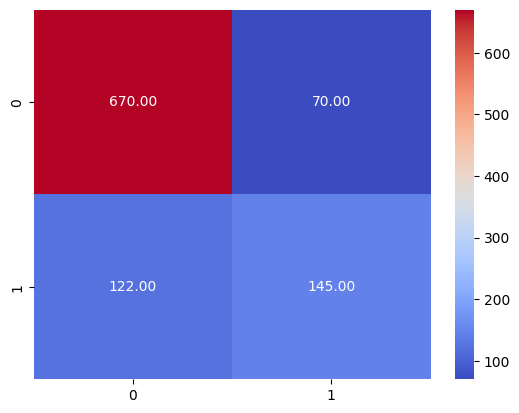

In [236]:
logistic_matrix = all_confusion_matrix['Logistic Regression']
sns.heatmap(logistic_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')

In [237]:
unbalanced_pipeline['Decision Tree']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [238]:
Logistic = unbalanced_pipeline['Logistic Regression']
Logistic

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [239]:
svc = unbalanced_pipeline['SVC']
svc

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', SVC(probability=True, random_state=42))])

#### *Train balanced Data*

In [240]:
balanced_table =pd.DataFrame(columns =['Model','Accuracy','Precision','Recall','f1_score'])
balanced_pipeline = {}
for model_name, classifier in models:
    pipeline =imbPipeline(steps =[
        ('preprocessor',preprocessor),
        ('over-sampler',SMOTE(random_state=42)),
        ('feature_selection',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',classifier)
    ])
    pipeline.fit(X_train,y_train)
    balanced_pipeline[model_name] = pipeline
    
    y_pred = pipeline.predict(X_test)
    # Map the string predictions to binary format
    y_pred_mapped = np.array([label_map[pred] for pred in y_pred])
    
    report = classification_report(y_test_encoded,y_pred_mapped)
    
    balanced_metrics = classification_report(y_test_encoded,y_pred_mapped,output_dict=True)
    
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']
    
    balanced_table.loc[len(balanced_table)] = [model_name,accuracy,precision,recall,f1]
    
balanced_table.sort_values(by='f1_score',ascending=False)
    


,Model,Accuracy,Precision,Recall,f1_score
3,Logistic Regression,0.776564,0.819136,0.776564,0.787155
1,SVC,0.774578,0.800486,0.774578,0.782748
2,Random Forest,0.779543,0.775524,0.779543,0.777317
0,Decision Tree,0.732870,0.751076,0.732870,0.739969


In [241]:
Logistic_reg = balanced_pipeline['Logistic Regression']
Logistic_reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot...
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('over-sampler', SMOTE(random_state=42)),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000025292B24860>)),
                ('classifier', LogisticRegression(random_state=42))])

In [242]:
forest = balanced_pipeline['Random Forest']
forest

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot...
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('over-sampler', SMOTE(random_state=42)),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x0000025292B24860>)),
                ('classifier', RandomForestClassifier(random_state=42))])

#### *Visualize ROC curve*

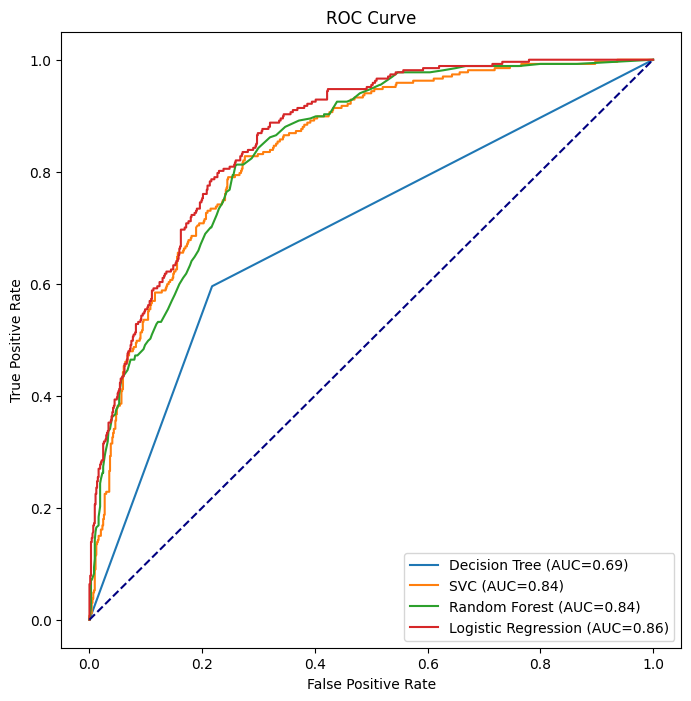

In [243]:
from sklearn.metrics import auc,roc_curve
roc_curve_data = {}

fig ,ax = plt.subplots(figsize=(8,8))

for model_name,pipeline in unbalanced_pipeline.items():
    
    y_score = pipeline.predict_proba(X_test)[:,1]
    
    fpr, tpr, threshold = roc_curve(y_test_encoded,y_score)
    roc_auc = auc(fpr,tpr)
    
    roc_curve_df= pd.DataFrame({
        'False Positive Rate':fpr,
        'True Positive Rate':tpr,
        'Threshold':threshold,
    })
    roc_curve_data[model_name] = roc_curve_df
    
    ax.plot(fpr, tpr, label=f'{model_name} (AUC={roc_auc:.2f})')
    
ax.plot([0, 1],[0, 1],color = 'navy',linestyle = '--' )
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend(loc='lower right')
plt.show()




In [244]:
roc_curve_data['Logistic Regression'].tail(40)

,False Positive Rate,True Positive Rate,Threshold
241,0.381081,0.917603,0.338125
242,0.386486,0.917603,0.336290
243,0.386486,0.921348,0.335519
244,0.394595,0.921348,0.327284
245,0.394595,0.925094,0.326970
246,0.401351,0.925094,0.322571
247,0.401351,0.928839,0.322375
248,0.421622,0.928839,0.302857
249,0.421622,0.943820,0.301475
250,0.422973,0.943820,0.300982


- The models performed better on the inbalanced dataset so we use the unbalance dataset for evaluation and hyperameter tuning

- #####  *Hyperparameter Tuning*

In [245]:
# Define the hyperparameters to search
from sklearn.model_selection import GridSearchCV, StratifiedKFold
param_grids = {

    'Decision Tree': {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },

    'Logistic Regression': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],        
        'classifier__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'classifier__max_iter': [300]
    },

    'SVC': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'classifier__gamma': ['scale', 'auto']
    },

    'Random Forest': {
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30]
    } 

    }


params = {}
search_histories = {}

for model_name, classifier in models:
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(
        estimator = final_pipeline, 
        param_grid = param_grid, 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
        scoring = ['f1_weighted', 'precision', 'recall'],
        refit = 'f1_weighted',
        verbose = 3, 
        n_jobs = -1
    )
    grid_search.fit(X_train, y_train_encoded)
    params[model_name] = grid_search
        
    search_history = pd.DataFrame(grid_search.cv_results_)        
    search_histories[model_name] = search_history

for model_name, grid_search in params.items():
    print(f'Best hyperparamters for {model_name}:{grid_search.best_params_}')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparamters for Decision Tree:{'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best hyperparamters for SVC:{'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best hyperparamters for Random Forest:{'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Best hyperparamters for Logistic Regression:{'classifier__C': 100, 'classifier__max_iter': 300, 'classifier__solver': 'liblinear'}


- *Getting Models with the best hyperparameters*

In [246]:
def get_best_models(params):
    best_models = []
    for model_name, grid_search in params.items():
        best_model = grid_search.best_estimator_
        best_models.append((model_name, best_model))    
    
    return best_models
 
best_models = get_best_models(params)

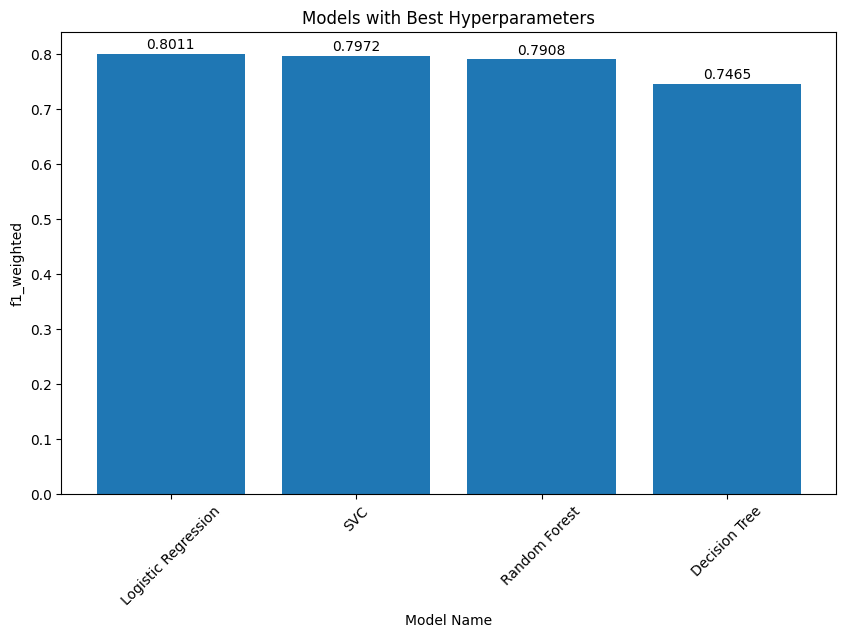

In [247]:
# Get models f1_weighted scores and names
model_names = [model_name for model_name in search_histories.keys()]
model_scores = [search_history['mean_test_f1_weighted'].max() for search_history in search_histories.values()]

# Create a DataFrame to for plot
df_models = pd.DataFrame({'model_name': model_names, 'f1_score': model_scores})
df_models = df_models.sort_values(by='f1_score', ascending=False)


# Create a bar chart
plt.figure(figsize=(10,6))
plt.bar(data=df_models, x='model_name', height='f1_score')

# Add text labels to the bars
for i, score in enumerate(df_models['f1_score']):
    plt.text(i, score+0.01, '{:1.4f}'.format(score), ha="center")

plt.xlabel('Model Name')
plt.ylabel('f1_weighted')
plt.title('Models with Best Hyperparameters')
plt.xticks(rotation=45)
plt.show()

- Comparing models before and after hyperparameter tuning by using f1 score (weighted) metric.

In [248]:
# Extract the best f1_scores from GridSearchCV results
tuning_results = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'SVC', 'Random Forest'],
    'f1_score_after': [
        params['Decision Tree'].best_score_,
        params['Logistic Regression'].best_score_,
        params['SVC'].best_score_,
        params['Random Forest'].best_score_
    ]
})

# Check the columns in unbalanced_table
print("Columns in unbalanced_table:", unbalanced_table.columns)

# Merge unbalanced results with tuning results
df_models = unbalanced_table[['Model', 'f1_score']]
metric_before_after_tuning_models = pd.merge(
    df_models, 
    tuning_results, 
    on='Model', 
    how='inner', 
    suffixes=('_before', '_after')
).sort_values(ascending=False, by='f1_score_after')

# Display the final results
print(metric_before_after_tuning_models)

Columns in unbalanced_table: Index(['Model', 'Accuracy', 'Precision', 'Recall', 'f1_score'], dtype='object')
                 Model  f1_score  f1_score_after
3  Logistic Regression  0.802286        0.801121
1                  SVC  0.790616        0.797199
2        Random Forest  0.786826        0.790771
0        Decision Tree  0.739292        0.746495


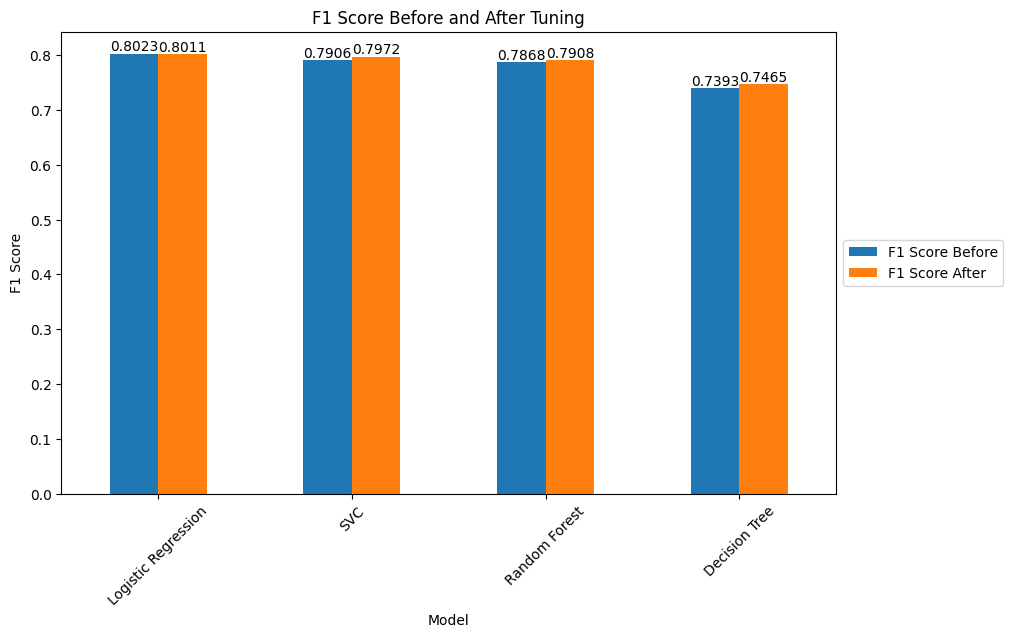

In [249]:
# Plotting the results on a histogram
ax = metric_before_after_tuning_models.plot(kind='bar', x='Model', y=['f1_score', 'f1_score_after'], figsize=(10, 6))
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Before and After Tuning')
plt.xticks(rotation=45)
plt.legend(['F1 Score Before', 'F1 Score After'], loc='center left', bbox_to_anchor=(1, 0.5))

# Annotate the values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

- *Feature Importance Visualization*

In [250]:
feature_columns = Logistic.named_steps['preprocessor'].get_feature_names_out()
feature_columns = np.array([col.split('__')[-1]for col in feature_columns])
feature_columns

array(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_On

In [251]:
# Extracting the coefficients
coefficients = Logistic.named_steps['classifier'].coef_[0]
importances = np.abs(coefficients)

# Creating the importance DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
})

# Sorting the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
2,TotalCharges,2.023686
18,InternetService_No,1.115859
17,InternetService_Fiber optic,1.057186
39,Contract_Two year,0.994176
37,Contract_Month-to-month,0.768468
1,MonthlyCharges,0.661493
0,tenure,0.413112
34,StreamingMovies_No,0.295558
13,MultipleLines_No,0.288603
40,PaperlessBilling_No,0.267716


In [252]:
# Access the coefficients since best model is logistic regression
coefficients = Logistic.named_steps['classifier'].coef_[0]

coefficients_df = pd.DataFrame({'Feature': feature_columns, 'Coefficient': coefficients})

# Magnitude of impact
coefficients_df['Absolute Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df.sort_values(by="Absolute Coefficient", ascending=False, inplace=True)

coefficients_df

,Feature,Coefficient,Absolute Coefficient
2,TotalCharges,-2.023686,2.023686
18,InternetService_No,-1.115859,1.115859
17,InternetService_Fiber optic,1.057186,1.057186
39,Contract_Two year,-0.994176,0.994176
37,Contract_Month-to-month,0.768468,0.768468
1,MonthlyCharges,0.661493,0.661493
0,tenure,0.413112,0.413112
34,StreamingMovies_No,-0.295558,0.295558
13,MultipleLines_No,-0.288603,0.288603
40,PaperlessBilling_No,-0.267716,0.267716


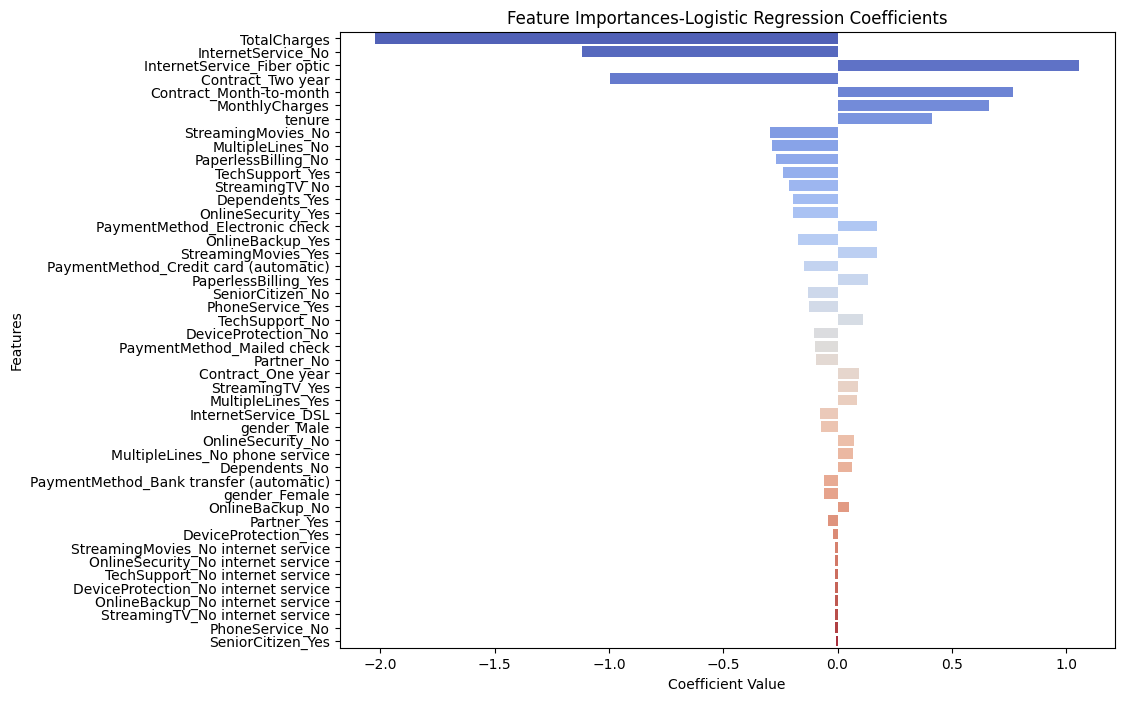

In [253]:
# Visualizing the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette='coolwarm')
plt.title('Feature Importances-Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

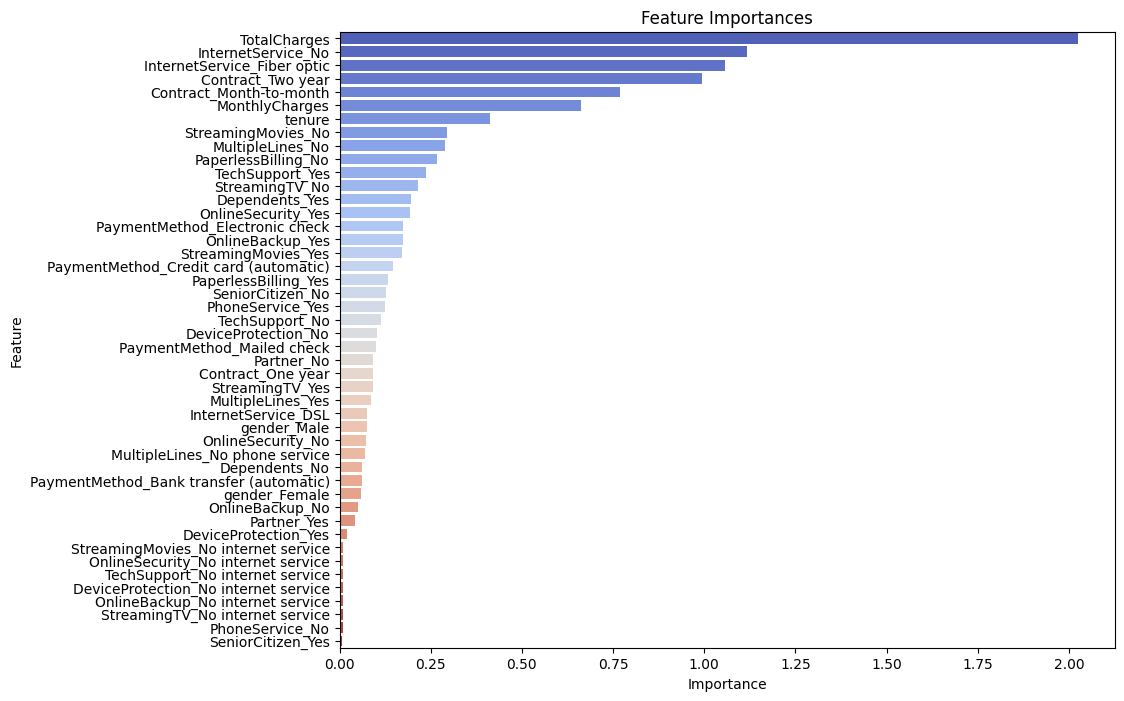

In [254]:
plt.figure(figsize=(10, 8))

sns.barplot(x='Importance',y='Feature',data=importance_df,palette='coolwarm',hue='Feature',legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

- ### *Evaluating the best model on the evaluation set*

In [255]:
y_test_pred = best_model.predict(X_test)
print(f'Classification report of the best model- {model_name}\n\n{classification_report(y_true=y_test_encoded, y_pred = y_test_pred)}')

Classification report of the best model- Logistic Regression

              precision    recall  f1-score   support

           0       0.92      0.72      0.80       740
           1       0.51      0.82      0.63       267

    accuracy                           0.74      1007
   macro avg       0.72      0.77      0.72      1007
weighted avg       0.81      0.74      0.76      1007



## *Test Model*

In [256]:
test_df = pd.read_excel('C:/Users/HP-PC/OneDrive - Azubi Africa/my azubi africa career accelerator projects/CUSTOMER-CHUN-PREDICTION-AT-VODAFONE-CORPORATION/data/Telco-churn-last-2000.xlsx')
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [257]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [258]:
# convert the totalcharge column to numerical datatype
test_df['TotalCharges'] =pd.to_numeric(test_df['TotalCharges'],errors='coerce')

In [259]:
#define a dictionary to map boolean and None values to a meaningful categories
mapping_new_cat_values = {
    'Partner':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes',},
    'Dependents':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'PhoneService':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'MultipleLines':{ False:'No', True:'Yes', 'No':'No', 'No phone service':'No phone service' , 'Yes':'Yes'},
    'OnlineSecurity':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service' },
    'OnlineBackup':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'DeviceProtection':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'TechSupport':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'StreamingTV':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'StreamingMovies':{False:'No', True:'Yes', 'No':'No', 'Yes':'Yes', 'No internet service':'No internet service'},
    'PaperlessBilling':{True:'Yes', False:'No', 'No':'No', 'Yes':'Yes'},
    'SeniorCitizen':{0:'No',1:'Yes'}
    }
    # convert the columns to category_column
for col in mapping_new_cat_values.keys():
    test_df[col] = test_df[col].astype('category')
# map the boolean and None values to meaningful categories  

test_df.replace(mapping_new_cat_values, inplace=True)
test_df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,No,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,No,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,9513-DXHDA,Male,No,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
5,0516-QREYC,Female,Yes,No,No,24,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.30,459.95
6,9685-WKZGT,Male,Yes,No,No,14,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.95,1036.75
7,6022-UGGSO,Female,Yes,No,No,32,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,2276.95
8,8084-OIVBS,Female,No,No,No,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.00,211.95
9,8896-BQTTI,Male,No,No,No,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,25.00,25.00


In [260]:
# # split data into x and y and drop index,coustomerID and churn columns test_df.drop(columns=['customerID',], axis =1)  
test_df.drop(columns= ['customerID'], axis =1) 
                      

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,No,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,Male,No,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80
2,Male,No,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,No,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,Female,No,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.30
1997,Male,Yes,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70
1998,Male,Yes,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [261]:
Logistic

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [262]:

# Print the best parameters
print(f'Best hyperparameters for Logistic Regression: {grid_search.best_params_}')

# Get the best estimator
best_estimator_logistic = grid_search.best_estimator_
#print(f'Best estimator for Logistic Regression: {best_estimator_logistic}')
best_estimator_logistic

Best hyperparameters for Logistic Regression: {'classifier__C': 100, 'classifier__max_iter': 300, 'classifier__solver': 'liblinear'}


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categorical data',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 LogisticRegression(C=100, max_iter=300, random_state=42,
                                    solver='liblinear'))])

In [263]:
y_aftertest_pred = Logistic.predict(test_df)
y_aftertest_pred

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [265]:
test_df['Churn'] = predictions
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7613-LLQFO,Male,No,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,1
1,4568-TTZRT,Male,No,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,0
2,9513-DXHDA,Male,No,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,0
3,2640-PMGFL,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,1
4,3801-HMYNL,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,1


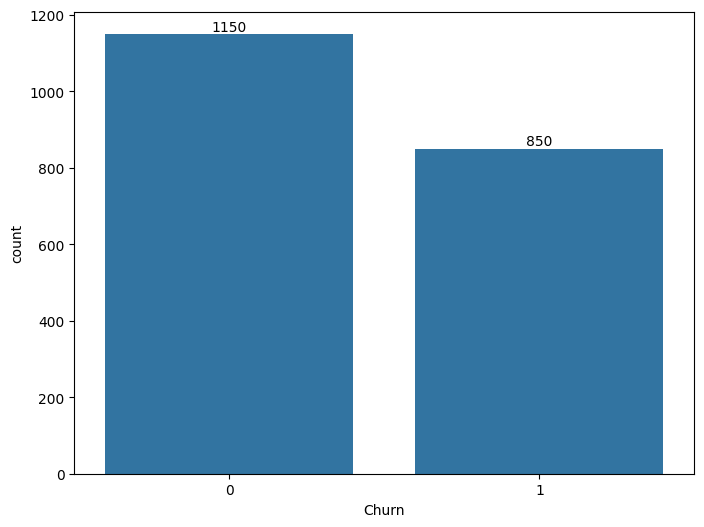

In [266]:
# Create the figure
plt.figure(figsize=(8, 6))

ax=sns.countplot(test_df, x='Churn')

# Add count values on top of each bar
for p in ax.patches:
    count = int(p.get_height())  # Convert count to integer
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

### *Save the two best models*

In [268]:
# Components to export

with open('logistic_churn_model_comp.pkl', 'wb') as f:
    joblib.dump(Logistic, f)

with open('svc_churn_model_components.pkl', 'wb') as f:
    joblib.dump(svc, f)